## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
mouse_data_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
mouse_data_complete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
Total_Mouse_Count = mouse_data_complete['Mouse ID'].nunique()
Total_Mouse_Count

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_df = mouse_data_complete[mouse_data_complete.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mouse = duplicate_df['Mouse ID'].unique()
duplicate_mouse

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_1 = mouse_data_complete.loc[mouse_data_complete["Mouse ID"] == "g989"]

#view duplicate data
duplicate_mouse_1


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
no_duplicates = mouse_data_complete.loc[mouse_data_complete["Mouse ID"] != "g989"]
no_duplicates.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.
print(no_duplicates['Mouse ID'].nunique())

248


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumour volume. 
mean = no_duplicates.groupby('Drug Regimen').mean()['Tumour Volume (mm3)']
median = no_duplicates.groupby('Drug Regimen').median()['Tumour Volume (mm3)']
variance = no_duplicates.groupby('Drug Regimen').var()['Tumour Volume (mm3)']
st_dev = no_duplicates.groupby('Drug Regimen').std()['Tumour Volume (mm3)']
std_err = no_duplicates.groupby('Drug Regimen').sem()['Tumour Volume (mm3)'] 

# Assemble the resulting series into a single summary dataframe.
sum_table = pd.DataFrame({"Mean" : mean, "Median" : median, "Variance" : variance, "St. Dev." : st_dev, "Std. Err." : std_err})
sum_table


,Mean,Median,Variance,St. Dev.,Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

agg_table = no_duplicates.groupby('Drug Regimen').agg({"Tumour Volume (mm3)":["mean", "median", "var", "std", "sem"]})
agg_table


Tumour Volume (mm3)                                          
                            mean     median        var       std       sem
Drug Regimen                                                              
Capomulin              40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin               52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol              52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril               55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol               54.331565  52.509285  66.173479  8.134708  0.596466
Placebo                54.033581  52.288934  61.168083  7.821003  0.581331
Propriva               52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane               40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn               54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol              53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Mice Tested')

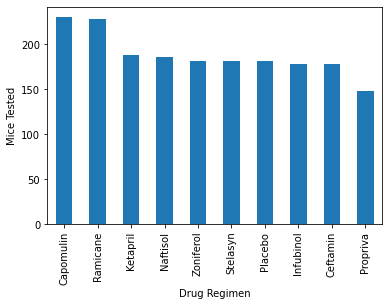

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
panda_chart = no_duplicates['Drug Regimen'].value_counts()
panda_chart.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Tested")


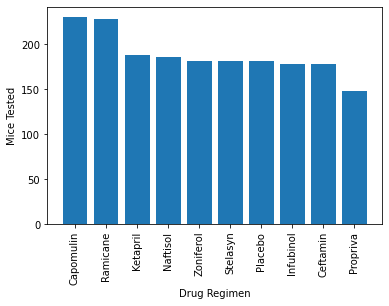

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
pyplot_chart = no_duplicates['Drug Regimen'].value_counts()
plt.bar(pyplot_chart.index.values,pyplot_chart.values)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Mice Tested")
plt.show()


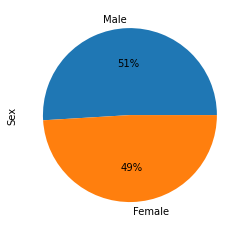

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts = no_duplicates.Sex.value_counts()
gender_counts.plot(kind="pie",autopct='%1.f%%')
plt.show()


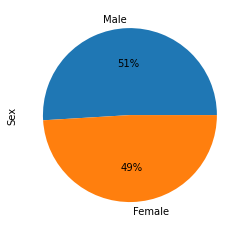

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_counts = no_duplicates.Sex.value_counts()
plt.pie(gender_counts.values,labels=gender_counts.index.values,autopct='%1.f%%')
plt.ylabel("Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = no_duplicates.groupby(["Mouse ID"])['Timepoint'].max()
max_timepoint = pd.DataFrame(max_timepoint)
# Merge this group df with the original dataframe to get the tumour volume at the last timepoint
last_timepoint = max_timepoint.merge(no_duplicates,on=['Mouse ID','Timepoint'])
last_timepoint

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumour Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [15]:
last_timepoint['Drug Regimen'].value_counts()

Placebo      25
Zoniferol    25
Ketapril     25
Capomulin    25
Ceftamin     25
Infubinol    25
Naftisol     25
Ramicane     25
Propriva     24
Stelasyn     24
Name: Drug Regimen, dtype: int64

In [18]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumour vol data (for plotting)
tumour_list = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_list:
    
    # Locate the rows which contain mice on each drug and get the tumour volumes
    tumour_volume = last_timepoint.loc[last_timepoint["Drug Regimen"] == drug, 'Tumour Volume (mm3)']    
    
    # add subset 
    tumour_list.append(tumour_volume)  
    
    # Determine outliers using upper and lower bounds
    quartiles = tumour_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumour_volume.loc[(tumour_volume < lower_bound) | (tumour_volume > upper_bound)]
    print(f"Outliers for {drug} : {outliers}")   

Outliers for Capomulin : Series([], Name: Tumour Volume (mm3), dtype: float64)
Outliers for Ramicane : Series([], Name: Tumour Volume (mm3), dtype: float64)
Outliers for Infubinol : 31    36.321346
Name: Tumour Volume (mm3), dtype: float64
Outliers for Ceftamin : Series([], Name: Tumour Volume (mm3), dtype: float64)


Text(0, 0.5, 'Tumour Volume')

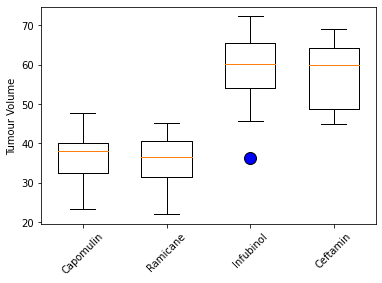

In [20]:
# Generate a box plot of the final tumour volume of each mouse across four regimens of interest
boxplot_dict = dict(markerfacecolor='blue',markersize=12)
plt.boxplot(tumour_list, labels = drug_list,flierprops=boxplot_dict,widths=(.6))
plt.xticks(rotation = 45)
plt.ylabel('Tumour Volume')

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumour volume vs. time point for a mouse treated with Capomulin
last_timepoint['Mouse ID'].value_counts(50)

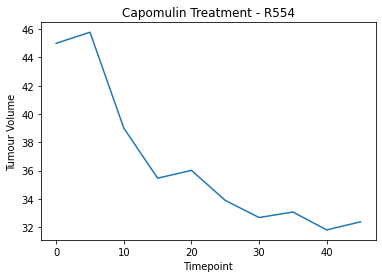

In [21]:
capomulin_treatment = no_duplicates.loc[no_duplicates['Drug Regimen'] == "Capomulin"]
mouse_id = capomulin_treatment.loc[capomulin_treatment['Mouse ID']== 'r554']
plt.plot(mouse_id['Timepoint'],mouse_id['Tumour Volume (mm3)'])
plt.xlabel('Timepoint')
plt.ylabel('Tumour Volume')
plt.title('Capomulin Treatment - R554')
plt.show()

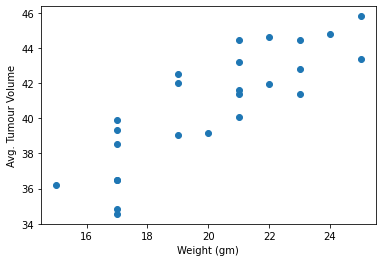

In [22]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen
avg_capomulin = capomulin_treatment.groupby(['Mouse ID']).mean()
plt.scatter(avg_capomulin['Weight (g)'],avg_capomulin['Tumour Volume (mm3)'])
plt.xlabel('Weight (gm)')
plt.ylabel('Avg. Tumour Volume')
plt.show()

## Correlation and Regression

Correlation of Mouse Weight and Average Tumour Volume: 0.84


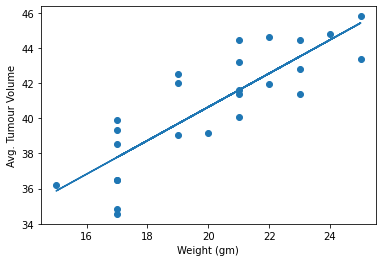

In [23]:
# Calculate the correlation coefficient and linear regression model 
correlation = round(st.pearsonr(avg_capomulin['Weight (g)'],avg_capomulin['Tumour Volume (mm3)'])[0],2)

# Print Correlation for mouse weight and tumor volume
print(f"Correlation of Mouse Weight and Average Tumour Volume: {correlation}")

#Set x and y values
x_values = avg_capomulin['Weight (g)']
y_values = avg_capomulin['Tumour Volume (mm3)']


regression  = st.linregress(x_values,y_values)

#Create slope and intercept variables

slope = regression[0]
intercept = regression[1]

# Calculate line equation
line_equation = x_values * slope + intercept

# Create scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,line_equation)
plt.xlabel('Weight (gm)')
plt.ylabel('Avg. Tumour Volume')
plt.show()

   ### Conclusions

It can be seen from the data that there is a  strong positive correlation of 0.84 between the Weight in grams of the mouse and the volume of the Tumour Observed

The data shows that as the timepoints increase on the Capomulin Treatment the Volume of the Tumour decreases

Whilst Capomulin shows a sprong positive correlation we do also see that it was also tested on the highest number of mice